# Projects -Cohort Analysis for assessing customer retention in E-commerce industry

## 04 - Cohort Analysis - cohort segmentation retention

Why do Cohort Analysis?<br>
• Understand customer retention over time.<br>
• See how many customers come back after their first purchase.<br>
• Check if newer customers behave better or worse than older ones.<br>
• Identify customer churn problems or marketing successes.

In [5]:
# Importe librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load de dataset
df = pd.read_csv('../dataset/Cleaned_Dataset_ecommerce2.csv')
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,TotalPrice,Country,InvoiceMonth,InvoiceDate2,Hour
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,664.95,Egypt,2010-12,2010-12-01,8
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,1862.95,Mali,2010-12,2010-12-01,8
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,4796.22,Mali,2010-12,2010-12-01,8
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,370.95,South Africa,2010-12,2010-12-01,8
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,1941.50,Rwanda,2010-12,2010-12-01,8


#### Assigning Cohort Month

In this step, we determine the **Cohort Month** for each customer.  
The Cohort Month represents the **month of the customer's first purchase**.

We calculate it by grouping the data by `CustomerID` and retrieving the earliest `InvoiceDate`.  
The resulting `CohortMonth` will serve as the base for calculating retention across time periods.

In [45]:
# Convert InvoiceDate to datetime if needed
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
# Assign the CohortMonth: take the minimum InvoiceDate per CustomerID
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
# Assign the CohortDate: take the first purchase of the Customer
df['CohortDate'] = df.groupby('CustomerID')['InvoiceDate2'].transform('min')

# Assign the CohortMonth: take the minimum InvoiceDate per CustomerID
df[['CustomerID', 'InvoiceDate', 'CohortDate', 'CohortMonth']]

,CustomerID,InvoiceDate,CohortDate,CohortMonth
0,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12
1,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12
2,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12
3,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12
4,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12
...,...,...,...,...
406824,12680.0,2011-12-09 12:50:00,2011-08-18,2011-08
406825,12680.0,2011-12-09 12:50:00,2011-08-18,2011-08
406826,12680.0,2011-12-09 12:50:00,2011-08-18,2011-08
406827,12680.0,2011-12-09 12:50:00,2011-08-18,2011-08


In [49]:
# Transform CohortDate to datetime
df['CohortDate'] = pd.to_datetime(df['CohortDate'], errors='coerce')

#### Calculate the CohortIndex

After assigning the Cohort Month and Cohort Date, we calculate the **Cohort Index** for each transaction.  
The Cohort Index indicates the **number of months or days that have passed** between a customer's first purchase and each subsequent purchase.

This allows us to align customers based on their lifecycle stage, making it easier to study retention trends over time.

In [51]:
def get_year_and_month(df, col):
    month = df[col].dt.month
    year = df[col].dt.year
    return month, year

In [53]:
first_month, first_year = get_year_and_month(df, 'CohortDate')

In [57]:
# df.dtypes
first_month

0         12
1         12
2         12
3         12
4         12
          ..
406824     8
406825     8
406826     8
406827     8
406828     8
Name: CohortDate, Length: 406829, dtype: int32

In [59]:
first_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
406824    2011
406825    2011
406826    2011
406827    2011
406828    2011
Name: CohortDate, Length: 406829, dtype: int32

In [61]:
latest_month, latest_year = get_year_and_month(df, 'InvoiceDate')

In [63]:
latest_month

0         12
1         12
2         12
3         12
4         12
          ..
406824    12
406825    12
406826    12
406827    12
406828    12
Name: InvoiceDate, Length: 406829, dtype: int32

In [65]:
latest_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
406824    2011
406825    2011
406826    2011
406827    2011
406828    2011
Name: InvoiceDate, Length: 406829, dtype: int32

In [67]:
def create_cohort_index(first_month, first_year, latest_month, latest_year):
    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    index = year_diff * 12 + month_diff + 1
    return index

In [113]:
df['CohortIndex'] = create_cohort_index(first_month, first_year, latest_month, latest_year)

In [115]:
df[['CustomerID', 'InvoiceDate', 'CohortDate', 'CohortMonth', 'CohortIndex']]

,CustomerID,InvoiceDate,CohortDate,CohortMonth,CohortIndex
0,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12,1
1,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12,1
2,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12,1
3,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12,1
4,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12,1
...,...,...,...,...,...
406824,12680.0,2011-12-09 12:50:00,2011-08-18,2011-08,5
406825,12680.0,2011-12-09 12:50:00,2011-08-18,2011-08,5
406826,12680.0,2011-12-09 12:50:00,2011-08-18,2011-08,5
406827,12680.0,2011-12-09 12:50:00,2011-08-18,2011-08,5


In [ ]:
"""
# Extract the invoice year, month, and cohort year, month
invoice_year = df['InvoiceDate'].dt.year
invoice_month = df['InvoiceDate'].dt.month
cohort_year = df['CohortMonth'].dt.year
cohort_month = df['CohortMonth'].dt.month

# Calculate the difference in years and months
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

# Total months difference
df['CohortIndex'] = years_diff * 12 + months_diff + 1  # +1 because we start counting at 1

# Check the result
df[['CustomerID', 'InvoiceDate', 'CohortMonth', 'CohortIndex']].head()
"""

#### Building the Cohort Retention Matrix

We group the data by **Cohort Month** and **Cohort Index**, counting the number of unique customers in each group.  
We then create a pivot table to form a **cohort retention matrix**.

The matrix shows **the percentage of customers retained** for each cohort over time.  
This allows us to visualize customer retention patterns and identify strong or weak cohorts.

In [120]:
# Group by CohortMonth and CohortIndex, and count unique customers
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

# Create a pivot table (matrix)
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='CustomerID')

# Calculate retention as percentage of the first month
cohort_sizes = cohort_counts.iloc[:,0]  # First column = initial cohort size
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Preview retention table
retention.round(3) * 100  # Display percentages nicely

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Visualizing the Cohort Retention Matrix

We visualize the cohort retention matrix using a **heatmap**.  
Each cell shows the **percentage of customers retained** after a given number of months.

The heatmap helps easily identify trends:
- Strong cohorts with high retention
- Cohorts that quickly drop off
- Periods where customer loyalty improved or declined

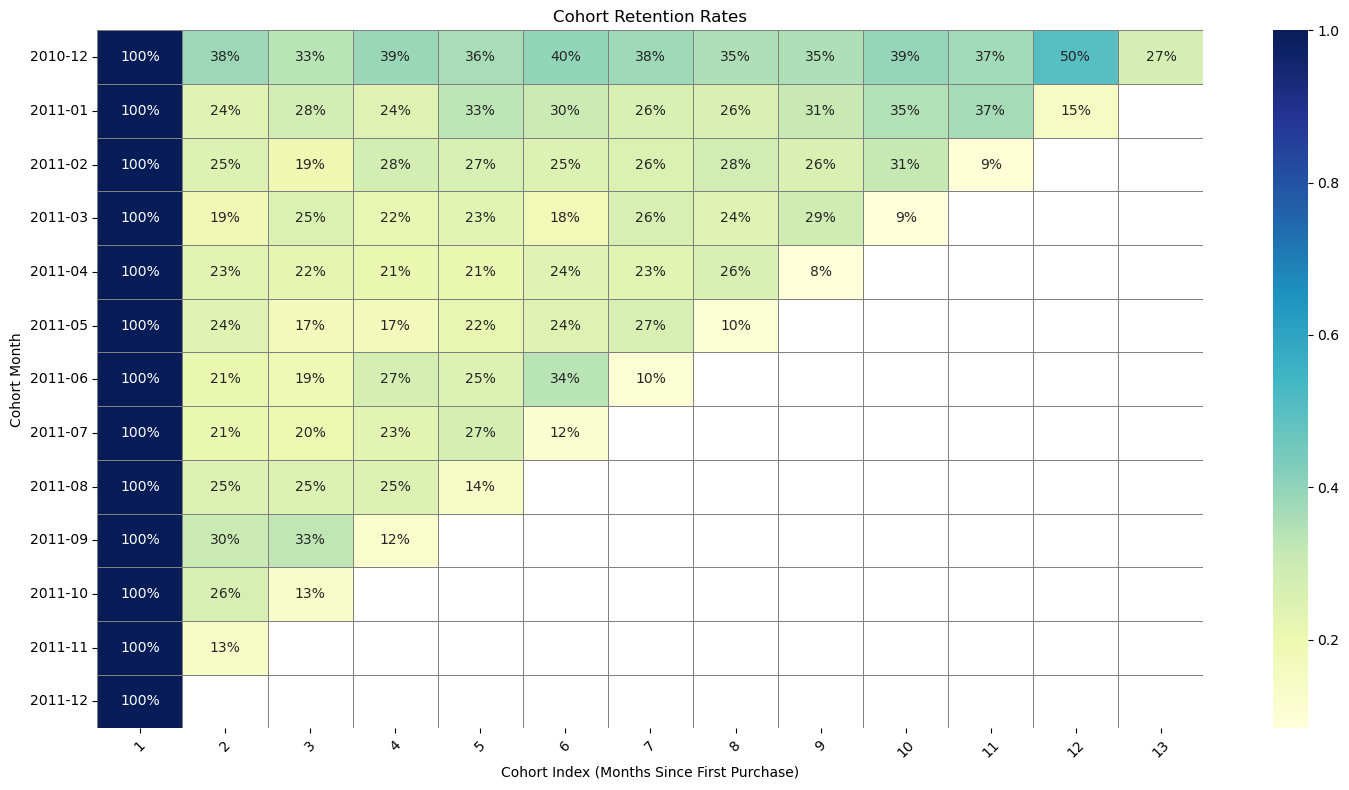

In [125]:
plt.figure(figsize=(15,8))
sns.heatmap(
    retention, 
    annot=True, 
    fmt='.0%', 
    cmap='YlGnBu', 
    linewidths=0.5, 
    linecolor='gray'
)
plt.title('Cohort Retention Rates')
plt.xlabel('Cohort Index (Months Since First Purchase)')
plt.ylabel('Cohort Month')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()